In [1]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as sf


# Start spark session
spark = SparkSession.builder.appName("ExoSearch").getOrCreate()

In [2]:
exotrain_df = spark.read.csv(path='exoTrain_new.csv', header=True, inferSchema=True)

In [3]:
exotrain_df.limit(1000).toPandas().head()

,LABEL,FLUX1,FLUX2,FLUX3,FLUX4,FLUX5,FLUX6,FLUX7,FLUX8,FLUX9,...,FLUX3188,FLUX3189,FLUX3190,FLUX3191,FLUX3192,FLUX3193,FLUX3194,FLUX3195,FLUX3196,FLUX3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [4]:
# 1 has confirmed to be only one planet system and 2 means that it can be multi-planet system

# How many stars there is in a dataset
exotrain_df.count()

5087

In [5]:
#empty_dict = [exotrain_df.filter(exotrain_df[str(col)].isNull()).count() for col in exotrain_df.columns]

In [6]:
# Check how many columns have null values
#print([x for x in empty_dict if x!=0])

## Begin analysis of data

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
pandas_df = exotrain_df.toPandas()

In [9]:
pandas_df

,LABEL,FLUX1,FLUX2,FLUX3,FLUX4,FLUX5,FLUX6,FLUX7,FLUX8,FLUX9,...,FLUX3188,FLUX3189,FLUX3190,FLUX3191,FLUX3192,FLUX3193,FLUX3194,FLUX3195,FLUX3196,FLUX3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5082,1,-91.91,-92.97,-78.76,-97.33,-68.00,-68.24,-75.48,-49.25,-30.92,...,139.95,147.26,156.95,155.64,156.36,151.75,-24.45,-17.00,3.23,19.28
5083,1,989.75,891.01,908.53,851.83,755.11,615.78,595.77,458.87,492.84,...,-26.50,-4.84,-76.30,-37.84,-153.83,-136.16,38.03,100.28,-45.64,35.58
5084,1,273.39,278.00,261.73,236.99,280.73,264.90,252.92,254.88,237.60,...,-26.82,-53.89,-48.71,30.99,15.96,-3.47,65.73,88.42,79.07,79.43
5085,1,3.82,2.09,-3.29,-2.88,1.66,-0.75,3.85,-0.03,3.28,...,10.86,-3.23,-5.10,-4.61,-9.82,-1.50,-4.65,-14.55,-6.41,-2.55


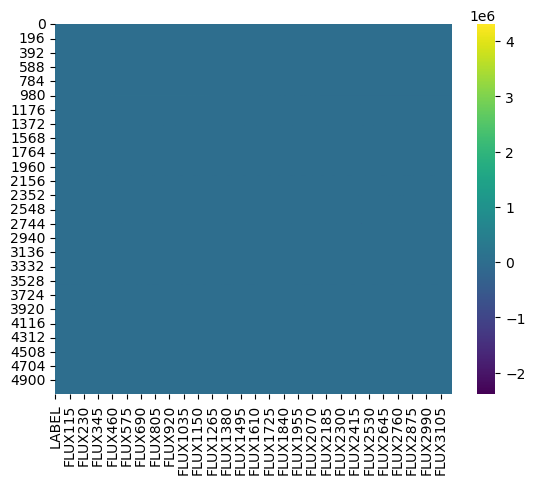

In [10]:
sns.heatmap(pandas_df, cmap='viridis')

plt.show()

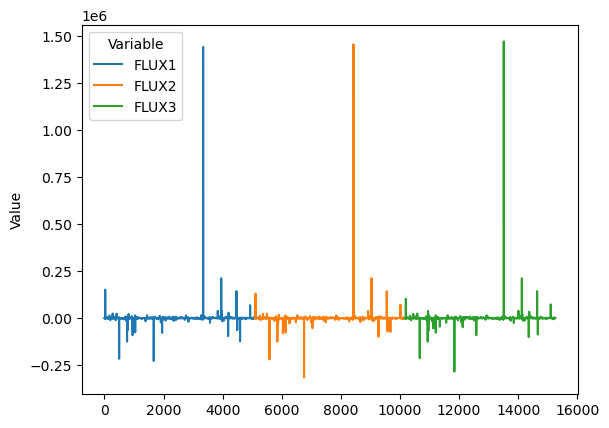

In [11]:
# Choose only first 3 stars 
col_selected = pandas_df[['FLUX1', 'FLUX2', 'FLUX3']]
# Melt them so seaborn can understand
df_melted = col_selected.melt(var_name='Variable', value_name='Value')

# Plot the lines on two facets
sns.lineplot(x=df_melted.index, y='Value', data=df_melted, hue='Variable')

plt.show()

In [12]:
# we can see that they are plotted correctly
print("First star maximum flux value is ", pandas_df['FLUX1'].max())
print("Second star maximum flux value is ", pandas_df['FLUX2'].max())
print("Third star maximum flux value is ", pandas_df['FLUX3'].max())

First star maximum flux value is  1439240.5
Second star maximum flux value is  1453319.0
Third star maximum flux value is  1468429.0


Text(0.5, 1.0, 'FLUX3')

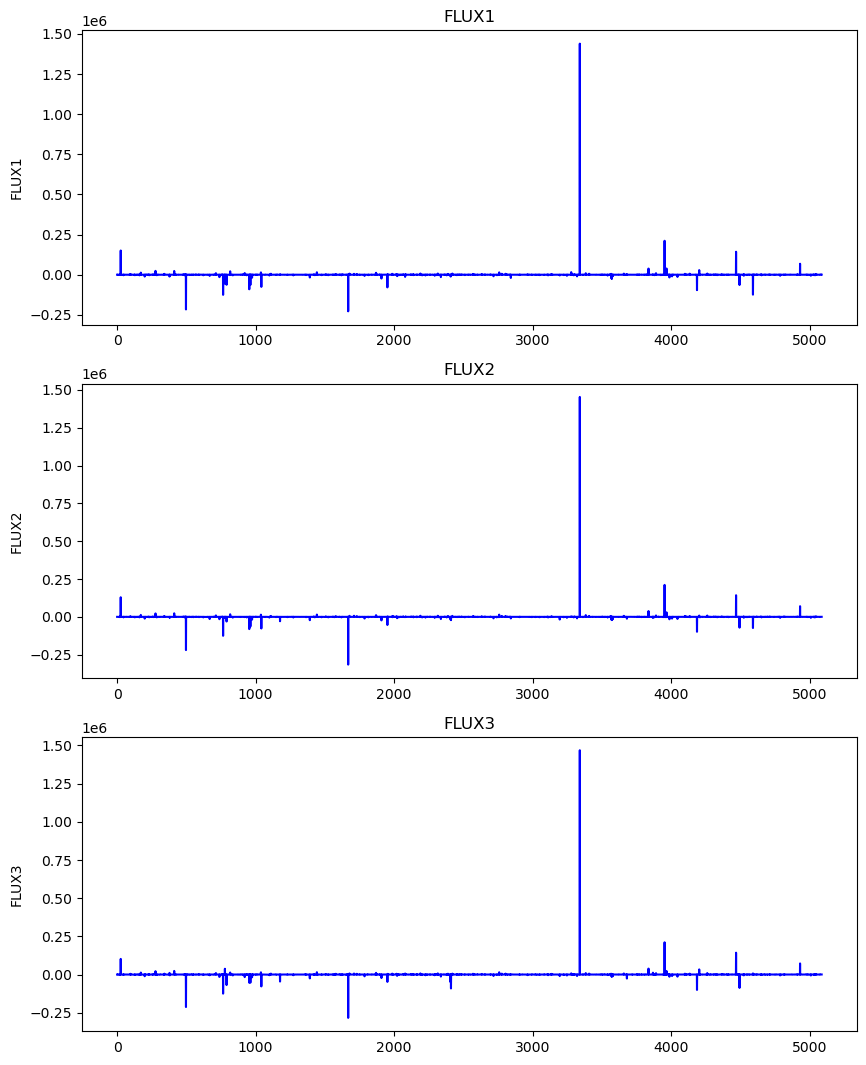

In [13]:
# Now lets plot the seperately
fig, axes = plt.subplots(3,1, figsize=[10,13])

sns.lineplot(ax=axes[0], data=pandas_df['FLUX1'], color='b')
axes[0].set_title('FLUX1')

sns.lineplot(ax=axes[1], data=pandas_df['FLUX2'], color='b')
axes[1].set_title('FLUX2')

sns.lineplot(ax=axes[2], data=pandas_df['FLUX3'], color='b')
axes[2].set_title('FLUX3')

# We can see that data are quite similar to each other however there are some small differences
# We must find these differences with ml model

## Begin machine learning part with spark

In [14]:
from pyspark.ml.feature import VectorAssembler, StandardScaler

In [15]:
old_columns = exotrain_df.columns

assembler = VectorAssembler(inputCols=old_columns, outputCol="features")
assembled_df = assembler.transform(exotrain_df)

scaler = StandardScaler(inputCol="features", outputCol="scaled_features")

# fit and transform
scaled_model = scaler.fit(assembled_df)
scaled_df = scaled_model.transform(assembled_df)
scaled_df = scaled_df.withColumn(
                'LABEL',
                sf.when(sf.col('LABEL') == 1, 0).otherwise(1)
)

In [16]:
# Having the above sdata scaled proceed with classification
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [17]:
scaled_df.limit(10).toPandas().head()

,LABEL,FLUX1,FLUX2,FLUX3,FLUX4,FLUX5,FLUX6,FLUX7,FLUX8,FLUX9,...,FLUX3190,FLUX3191,FLUX3192,FLUX3193,FLUX3194,FLUX3195,FLUX3196,FLUX3197,features,scaled_features
0,1,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54,"[2.0, 93.85, 83.81, 20.1, -26.98, -39.56, -124...","[23.534365355567186, 0.004363759131725011, 0.0..."
1,1,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93,"[2.0, -38.88, -33.83, -58.54, -40.09, -79.31, ...","[23.534365355567186, -0.001807809856595295, -0..."
2,1,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67,"[2.0, 532.64, 535.92, 513.73, 496.92, 456.45, ...","[23.534365355567186, 0.024766251080682044, 0.0..."
3,1,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98,"[2.0, 326.52, 347.39, 302.35, 298.13, 317.74, ...","[23.534365355567186, 0.015182254999369744, 0.0..."
4,1,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54,"[2.0, -1107.21, -1112.59, -1118.95, -1095.1, -...","[23.534365355567186, -0.05148212837759456, -0...."


In [18]:
classifier = LogisticRegression(featuresCol="scaled_features", labelCol="LABEL")
model = classifier.fit(scaled_df)

In [19]:
# Lets scale also test dataframe
exotest_df = spark.read.csv(path='exoTest_new.csv', header=True, inferSchema=True)
old_columns = exotest_df.columns

assembler = VectorAssembler(inputCols=old_columns, outputCol="features")
assembled_df = assembler.transform(exotest_df)

scaler = StandardScaler(inputCol="features", outputCol="scaled_features")

# fit and transform
scaled_model = scaler.fit(assembled_df)
scaledtrain_df = scaled_model.transform(assembled_df)
scaledtrain_df = scaledtrain_df.withColumn(
                'LABEL',
                sf.when(sf.col('LABEL') == 1, 0).otherwise(1)
)

In [20]:
# Evaluate the model
predictions = model.transform(scaledtrain_df)

evaluator = MulticlassClassificationEvaluator(labelCol='LABEL', predictionCol='prediction', metricName='accuracy')
accuracy = evaluator.evaluate(predictions)

In [21]:
print(accuracy)

0.9982456140350877


In [28]:
predictions.filter(sf.col('prediction') != sf.col('LABEL')).limit(10).toPandas().head()

,LABEL,FLUX1,FLUX2,FLUX3,FLUX4,FLUX5,FLUX6,FLUX7,FLUX8,FLUX9,...,FLUX3193,FLUX3194,FLUX3195,FLUX3196,FLUX3197,features,scaled_features,rawPrediction,probability,prediction
0,0,1968.91,1914.66,1897.09,1773.5,1732.06,1594.63,1494.91,-2602.34,-15632.94,...,-623.09,322.53,438.84,687.78,785.25,"[1.0, 1968.90999999997, 1914.65999999997, 1897...","[10.714806561297202, 0.1563501783448451, 0.151...","[-42.06311962795672, 42.06311962795672]","[5.397830636813677e-19, 1.0]",1.0


In [30]:
print("Exoplanets: ", predictions.filter(sf.col('LABEL') == 1).count())
print("Not exoplanets: ", predictions.filter(sf.col('LABEL') == 0).count())

Exoplanets:  5
Not exoplanets:  565


In [23]:
# Stop the spark session
#spark.stop()